In [86]:
import numpy as np
import matplotlib.pylab as plt
import os, glob, math, sys, subprocess
import pandas as pd


In [2]:
# dictionary with input parameters to feed to c++ executable

pars = {
'executable' : "./neural_network",
'train_size' : 36000,
'batch_size' : 10,
'epochs' : 30,
'Lambda' : 10.0,
'eta' : 0.5,
'monitor_cost' : 0,
'print_cost' : 1,
'verbose' : 0,
'monitor_accuracy' : 0, 
'print_accuracy' : 1,
'train_label_output' : "lambda10_eta05",
'Layers': [784,30,10] ,
'train' : 1,
'save_weights' : 1,
'load_weights' : 0,
'test_NN' : 1,
'cross_validate' : 1,
'test_size' :10000,
'test_label_output' : 'output_cv.txt',
'weights_label' : '07-05'
}


In [3]:
# transforming the dictionary in a list and each element in the list into a string
def convert_pars():
    par_list =[]
    par_list.append(pars['executable'])
    par_list.append(pars['train_size'])
    par_list.append(pars['batch_size'])
    par_list.append(pars['epochs'])
    par_list.append(pars['Lambda'])
    par_list.append(pars['eta'])
    par_list.append(pars['monitor_cost'])
    par_list.append(pars['print_cost'])
    par_list.append(pars['verbose'])
    par_list.append(pars['monitor_accuracy'])
    par_list.append(pars['print_accuracy'])
    par_list.append(pars['train_label_output'])
    par_list.append(len(pars['Layers']))
    [par_list.append(x) for x in pars['Layers']]
    par_list.append(pars['train'])
    par_list.append(pars['save_weights'])
    par_list.append(pars['load_weights'])
    par_list.append(pars['test_NN'])
    par_list.append(pars['cross_validate'])
    par_list.append(pars['test_size'])
    par_list.append(pars['test_label_output'])
    par_list.append(pars['weights_label'])
    return [str(x) for x in par_list]

In [10]:
# calling the execution of neural_network, this is a first try
final_list = convert_pars()
subprocess.call(final_list)

0

### Testing ###
The C++ code takes now all the parameters as inputs, I defined a dictionary where I can access and modify easily the parameters from the notebook. This allows me to perform more systematic studies without recompiling and accessing the C++ code.

In [82]:
for size in range(100,1100,100):
    pars['train_size'] = size
    pars['train_label_output'] = '{:04}'.format(size)
    par_list = convert_pars()
    subprocess.call(par_list)

### Learning Curve ###
This test serves to me to understand whether the SGD is working properly. 
Indeeed, over may epochs of training and without regularization, the network saturates its accuracy on the test set while behaving rather poorly on the CV set. 
Next step will be the introduction of regularization parameter and its tuning to achieve good performance both on the training and CV sets.

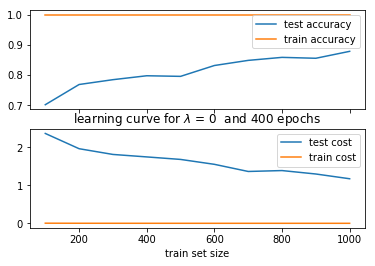

In [86]:
fig, ax =plt.subplots(2,1, sharex = True)
a,c = np.genfromtxt(pars['test_label_output'],unpack=True)
ax[0].plot(range(100,1100,100), a, label = 'test accuracy')
ax[1].plot(range(100,1100,100),c, label = 'test cost')

train_a = []
train_c = []
for size in range(100,1100,100):
    e,a,c = np.genfromtxt("train_output_{:04d}".format(size), unpack = True)
    train_a.append(a[-1])
    train_c.append(c[-1])
ax[0].plot(range(100,1100,100), train_a, label = 'train accuracy')
ax[1].plot(range(100,1100,100),train_c,  label = 'train cost')
[x.legend(loc='best') for x in ax]
ax[1].set_xlabel('train set size')
plt.title('learning curve for $\lambda$ = 0  and 400 epochs')
plt.show()

### Tune step size of stochastic gradient descent ###

In [91]:
pars['train_size'] = 30000
pars['test_size'] = 10000
pars['cross_validate'] = 1
pars['Lambda'] = 0
pars['test_label_output'] = 'optimize_eta'
for eta in [0.1,1,10]:
    pars['eta']=eta
    pars['train_label_output'] = 'eta_'+str(eta)
    final_list = convert_pars()
    subprocess.call(final_list)

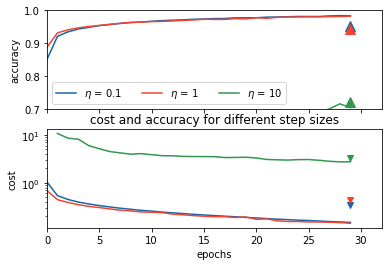

In [138]:
colors = [plt.cm.Blues(0.8),plt.cm.Reds(0.6),plt.cm.Greens(0.7)]
fig, ax = plt.subplots(2,1, sharex = 'col')
for col,eta in zip(colors,[0.1,1,10]):
    e,a,c = np.genfromtxt('train_output_eta_{}'.format(eta),unpack=True)
    ax[0].plot(e,a, color = col, label = '$\eta$ = {}'.format(eta))
    ax[1].semilogy(e,c, color = col, label = '$\eta$ = {}'.format(eta))
    
test_a,test_c = np.genfromtxt('optimize_eta',unpack=True)
for a,c,col in zip(test_a, test_c,colors):
    ax[0].plot(29,a, '^',color = col,markersize = 10)
    ax[1].plot( 29, c, 'v',color = col)
ax[1].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel('cost')
ax[0].legend(loc= 'best',ncol=3)
ax[0].set_xlim(0,32)
ax[0].set_ylim(0.7,1)
plt.title('cost and accuracy for different step sizes')
plt.show()

### Regularization and large train set ###

saturation for small train set and no regularization

In [61]:
pars = {
'executable' : "./neural_network",
'train_size' : 1000,
'batch_size' : 10,
'epochs' : 1000,
'Lambda' : 0.0,
'eta' : 3.0,
'monitor_cost' : 1,
'print_cost' : 1,
'verbose' : 0,
'monitor_accuracy' : 1, 
'print_accuracy' : 1,
'train_label_output' : "train_label_output",
'Layers': [784,30,10] ,
'train' : 1,
'save_weights' : 1,
'load_weights' : 0,
'test_NN' : 1,
'cross_validate' : 1,
'test_size' :1000,
'test_label_output' : "1000_0_3",
'weights_label' : 'weights_10-05'
}

In [62]:
final_list = convert_pars()
subprocess.call(final_list)
    

0

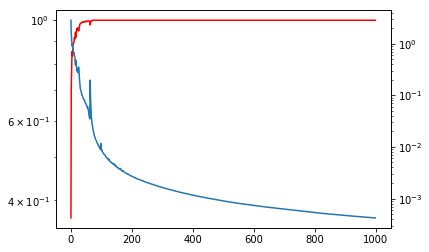

In [65]:
e,a,c = np.genfromtxt('train_output_1000_0_3',unpack = True)
plt.semilogy(e,a,'r')
ax2 = plt.twinx()
ax2.semilogy(e,c)
plt.show()

In [68]:
pars = {
'executable' : "./neural_network",
'train_size' : 40000,
'batch_size' : 10,
'epochs' : 1,
'Lambda' : 0.0,
'eta' : 3.0,
'monitor_cost' : 0,
'print_cost' : 1,
'verbose' : 0,
'monitor_accuracy' : 0, 
'print_accuracy' : 1,
'train_label_output' : "40k_0_3",
'Layers': [784,30,10] ,
'train' : 1,
'save_weights' : 1,
'load_weights' : 0,
'test_NN' : 1,
'cross_validate' : 1,
'test_size' :10000,
'test_label_output' : "40k_0_3",
'weights_label' : 'weights_10-05'
}

In [69]:
pars['train_label_output'] = "40k_0_3_{}".format(0)
final_list = convert_pars()
subprocess.call(final_list)
pars['load_weights'] = 1
for i in range(1,201):
    pars['train_label_output'] = "40k_0_3_{}".format(i)
    final_list = convert_pars()
    subprocess.call(final_list)
    


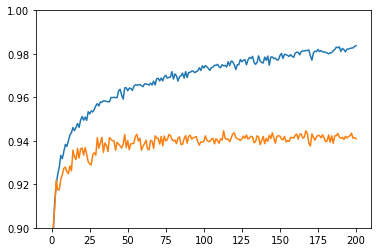

In [102]:
train_list = glob.glob('train_output_40k_0_3_*')

ep = []
ac = []
loss = []
for el in train_list:
    e = el.split('_')[-1]
    o,a, c = np.genfromtxt(el,unpack = True)
    ep.append(int(e))
    ac.append(a)
    loss.append(c)
    
data ={'epoch' : ep, 'accuracy' : ac, 'loss' : loss}
df = pd.DataFrame(data)
train_df = df.sort_values(by = 'epoch')

a,l = np.genfromtxt('40k_0_3', unpack = True)
test_df = pd.DataFrame({'epoch':range(0,len(a)),'accuracy':a,'loss':l})

plt.plot(train_df['epoch'],train_df['accuracy'])
plt.plot(test_df['epoch'],test_df['accuracy'])
plt.ylim(0.9,1)
plt.show()

### Using regularization $\lambda = 10.0$

In [73]:
pars = {
'executable' : "./neural_network",
'train_size' : 40000,
'batch_size' : 10,
'epochs' : 1,
'Lambda' : 10.0,
'eta' : 0.5,
'monitor_cost' : 0,
'print_cost' : 1,
'verbose' : 0,
'monitor_accuracy' : 0, 
'print_accuracy' : 1,
'train_label_output' : "40k_10_05",
'Layers': [784,30,10] ,
'train' : 1,
'save_weights' : 1,
'load_weights' : 0,
'test_NN' : 1,
'cross_validate' : 1,
'test_size' :10000,
'test_label_output' : "40k_10_05",
'weights_label' : 'weights_10-05'
}

In [75]:
pars['train_label_output'] = "40k_10_05_{:03d}".format(0)
final_list = convert_pars()
subprocess.call(final_list)
pars['load_weights'] = 1
for i in range(1,201):
    pars['train_label_output'] = "40k_10_05_{:03d}".format(i)
    final_list = convert_pars()
    subprocess.call(final_list)

In [105]:
train_list = glob.glob('train_output_40k_10_05_*')

ep = []
ac = []
loss = []
for el in train_list:
    e = el.split('_')[-1]
    o,a, c = np.genfromtxt(el,unpack = True)
    ep.append(int(e))
    ac.append(a)
    loss.append(c)
    
data ={'epoch' : ep, 'accuracy' : ac, 'loss' : loss}
df = pd.DataFrame(data)
reg_train_df = df.sort_values(by = 'epoch')

a,l = np.genfromtxt('40k_10_05', unpack = True)
reg_test_df = pd.DataFrame({'epoch':range(0,len(a)),'accuracy':a,'loss':l})



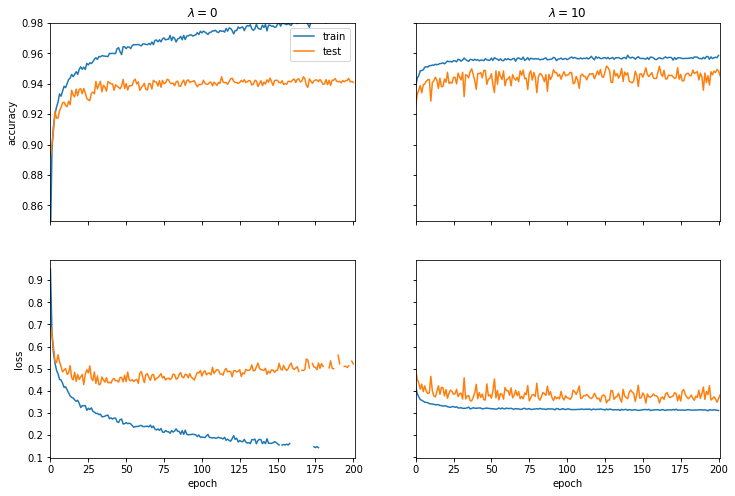

In [133]:
fig, ax = plt.subplots(2,2,figsize=(12,8),sharex = True, sharey ='row')
train_df.plot('epoch','accuracy', ax = ax[0,0],label = 'train', title = '$\lambda = 0$')
test_df.plot('epoch','accuracy',ax= ax[0,0], label = 'test')
reg_train_df.plot('epoch','accuracy', ax = ax[0,1], legend = False, title = '$\lambda = 10$')
reg_test_df.plot('epoch','accuracy',ax= ax[0,1],legend = False)
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_ylim(0.85,0.98)

train_df.plot('epoch','loss', ax = ax[1,0],legend = False)
test_df.plot('epoch','loss',ax= ax[1,0], legend= False)
reg_train_df.plot('epoch','loss', ax = ax[1,1], legend = False)
reg_test_df.plot('epoch','loss',ax= ax[1,1], legend = False)
ax[1,0].set_ylabel('loss')

plt.show()